In [237]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Linear regression

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

Assume the **data generating process** is given by:

In [541]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

**The data you have access to is:**

In [542]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

**Question 1:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}$$

In [545]:
# For the OLS estimation I try to do it as manually as possible by estimating each coefficient seperately

def estimate_coef1(x1, y): 
    n1 = np.size(x1) 
  
    # Taking the mean of the x1 vector and the y vector 
    m_x1 = np.mean(x1)
    m_y = np.mean(y)
  
    # Cross-deviation and deviation of x1 
    SS_xy1 = np.sum(y*x1) - n1*m_y*m_x1 
    SS_xx1 = np.sum(x1*x1) - n1*m_x1*m_x1 
  
    # Defining the coefficient beta 1 
    b_1 = SS_xy1 / SS_xx1 
      
    return(b_1)

def estimate_coef2(x2, y): 
    n2 = np.size(x2) 
  
    # Taking the mean of the x2
    m_x2 = np.mean(x2) 
  
    # Cross-deviation and deviation of x2 
    SS_xy2 = np.sum(y*x2) - n2*m_y*m_x2 
    SS_xx2 = np.sum(x2*x2) - n2*m_x2*m_x2 
  
    # Defining the coefficient beta 2 
    b_2 = SS_xy2 / SS_xx2 
      
    return(b_2)

# Defining the function of beta 0
def beta0(m_y, b_1, m_x1, b_2, m_x2):
    return m_y - b_1*m_x1 - b_2*m_x2
  
b1 = estimate_coef1(x1, y)

b2 = estimate_coef2(x2, y)

b0 = beta0(m_y, b1, m_x1, b2, m_x2)

print("Beta 0 is estimated to be : " + str(b0))
print("Beta 1 is estimated to be : " + str(b1))
print("Beta 2 is estimated to be : " + str(b2))

Beta 0 is estimated to be : 0.09567934013657468
Beta 1 is estimated to be : 0.29359439934083037
Beta 2 is estimated to be : 0.5037077351231648


**Question 2:** Construct a 3D plot, where the data is plotted as scattered points, and the prediction of the model is given by the plane

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i}$$

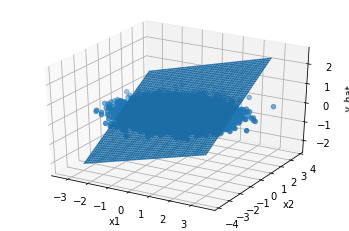

In [547]:
# Importing relevant packages
from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt

# Setting up the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Constructing variables and ranges for the plot
x1_surf=np.arange(-3, 3, 0.01)                
x2_surf=np.arange(-3, 3, 0.01)
x_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)
y_hat = b0 + b1*x1_surf + b2*x2_surf

# Constructing the scatter plot consisting of the observations
ax.scatter(x1,x2)

# Constructing the surface plot that shows the prediction
ax.plot_surface(x1_surf, x2_surf, y_hat); 

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y_hat')

plt.show()

**Question 3:** Esimtate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using a **numerical solver** to solve the ordinary least square problem, shown below, directly. Compare your results with the matrix algebra results.

$$ \min_{\mathbf{\beta}} \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) )^2 $$

In [549]:
# Importing relevant packages
from scipy import optimize

# Comprising the dataset
X = [x1, x2]

# TUrning the dataset into array
X_arr = np.array(X)

# Transposing dataset
X_tp = X_arr.transpose()

# Applying optimizer
reg = linear_model.LinearRegression()
reg.fit(X_tp, y)

b_0 = reg.intercept_ 
coeff = reg.coef_

print("Beta0 is derived as : " + str(b_0))
print("Beta1 and Beta2 are derived respectively as : " + str(coeff))

Beta0 is derived as : 0.0956821049238978
Beta1 and Beta2 are derived respectively as : [0.29294299 0.50332771]


The coefficients match the algebraic results, which I take as a good sign.

**Question 4:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **least absolute deviations (LAD)** using a numerical solver to solve the following problem directly: 

$$  \min_{\beta} \sum^N_{i=1} |y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) | $$

where $|z|$ is the absolute value of $z$.

In [550]:
# First off I set up an empty variable for the resiuals
res = np.empty(len(x1))

# The residuals are defined
def residual(b0,b1,b2):

    for i in range(len(x1)):
        res[i] = (y[i] - b0 - b1*x1[i] - b2*x2[i])
    return res

# Then I set up an initial guess for the minimization problem based on the findings in question 1
x0 = [0, 0.3, 0.5]

# Now I define z as the absolute value
def z(x,b0,b1,b2):
    b0 = x[0]
    b1 = x[1]
    b2 = x[2]
    sse1 = np.sum(np.abs(residuals(b0,b1,b2)))
    return sse1

# Optimizing over z
obj = optimize.minimize(z,x0,method='SLSQP',args=(b0,b1,b2))

# Assigning values to beta0, beta1 and beta2 and present them
b0 = obj.x[0]
b1 = obj.x[1]
b2 = obj.x[2]


print("With LAD regresssion the intercept is : " + str(b0))
print("With LAD regresssion beta1 is : " + str(b1))
print("With LAD regresssion beta2 is : " + str(b2))

With LAD regresssion the intercept is : 0.0922338956927247
With LAD regresssion beta1 is : 0.30745446785057234
With LAD regresssion beta2 is : 0.5115510911762483


**Question 5:** Set $N = 50$. Repeat the estimation using the **OLS** and **LAD** methods $K=5000$ times, drawing a new random sample from the data generating process each time. Compare the estimates from each method using histograms. Which method do you prefer? Explain your choice.

In [267]:
# First the Ordinary Least Square method is considered
N = 50
K = 5000

# Setting up empty lists as coeffecients
b0_ols = np.empty(K)
b1_ols = np.empty(K)
b2_ols = np.empty(K)

# Running the simulation
for i in range(K):
    x1_ols, x2_ols, y_ols = DGP(N)
    SSE = np.empty(N)
    
    def ols_res(b0_ols, b1_ols, b2_ols):
        
        for i in range(N):
            SSE[i] = y_ols[i] - (b0_ols + b1_ols*x1_ols[i] + b2_ols*x2_ols[i])
        return SSE
    
    x0_ols = [0,0.3,0.5]
    
    def z_ols(x, b0_ols, b1_ols, b2_ols):
        b0_ols = x[0]
        b1_ols = x[1]
        b2_ols = x[2]
        SSE_ols = np.sum(ols_res(b0_ols,b1_ols,b2_ols)**2)
        return SSE_ols
    
    # Optimizing
    obj_ols = optimize.minimize(z_ols,x0_ols,method='SLSQP',args=(b0_ols,b1_ols,b2_ols))
    
    b0_ols[i] = obj_ols.x[0]
    b1_ols[i] = obj_ols.x[1]
    b2_ols[i] = obj_ols.x[2]

In [268]:
# Then the Least Absolute Deviation is considered
N = 50
K = 5000

# Setting up empty lists as coeffecients
b0_lad = np.empty(K)
b1_lad = np.empty(K)
b2_lad = np.empty(K)

#Running the simulation
for i in range(K):
    x1_lad, x2_lad, y_lad = DGP(N)
    SSE_lad=np.empty(N)

    def lad_res(b0_lad,b1_lad,b2_lad):

        for i in range(N):
            SSE_lad[i] = y_lad[i] - (b0_lad + b1_lad*x1_lad[i] + b2_lad*x2_lad[i])
        return SSE_lad
    
    x0_lad = [0,0.3,0.5]
    
    def z_lad(x,b0_lad,b1_lad,b2_lad):
        b0_lad=x[0]
        b1_lad=x[1]
        b2_lad=x[2]
        SSS_lad = np.sum(np.abs(lad_res(b0_lad,b1_lad,b2_lad)))
        return SSS_lad
    
    # Optimizing
    obj_lad = optimize.minimize(z_lad,x0_lad,method='SLSQP',args=(b0_lad,b1_lad,b2_lad))
    
    b0_lad[i]=obj_lad.x[0]
    b1_lad[i]=obj_lad.x[1]
    b2_lad[i]=obj_lad.x[2]

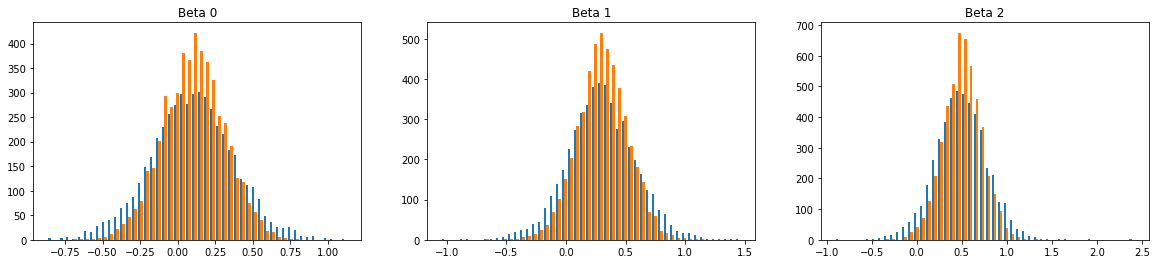

In [553]:
# Creating histograms showing the difference in estimators
fig = plt.figure(figsize=(20,4))

ax = fig.add_subplot(1,3,1)
x_multi = [b0_ols, b0_lad]
ax.hist(x_multi, bins=50, histtype='bar')
ax.set_title('Beta 0')

ax = fig.add_subplot(1,3,2)
x_multi1 = [b1_ols, b1_lad]
ax.hist(x_multi1, bins=50, histtype='bar')
ax.set_title('Beta 1')

ax = fig.add_subplot(1,3,3)
x_multi2 = [b2_ols, b2_lad]
ax.hist(x_multi2, bins=50, histtype='bar')
ax.set_title('Beta 2')

plt.show()

I would prefer the Ordinary Least Squared method. Even though the estimator is less robust than that of the Least Absolute Deviation regression, the fact that it is stable and only provide a single solution, makes it preferable in many situations. Furthermore, as I interpret the data, not many outliers are present, which would be in favor of choosing LAD.

# Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

The **parameters** and **grids** for $m_1$, $m_2$ and $d$ should be:

In [555]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
r = 0.04
Delta = 0.25
chi = 0.9

# b. grids
m1_vec = np.linspace(1e-8,10,100)
m2_vec = np.linspace(1e-8,10,100)
d_vec = np.linspace(1e-8,5,100)

**Question 1:** Find and plot the functions $v_{2}(m_{2},d)$, $c^{\ast}(m_2,d)$, and $x^{\ast}(m_2,d)$. Comment.

In [556]:
# Defining basic functions
def v2(m2,d,c,alpha,rho,chi):
    x = m2 - c
    return ((c**alpha*(d+chi*x)**(1-alpha))**(1-rho))/(1-rho)

def v1(d, m1,Delta,beta,r,v2_interp):
    
    # v2 value - low income
    m2_low = (1+r)*(m1-d) + 1-Delta
    v2_low = v2_interp([m2_low, d])[0]
    
    # v2 value - Middle income
    m2_mid = (1+r)*(m1-d) + 1
    v2_mid = v2_interp([m2_mid, d])[0]
    
    # v2 value - High income
    m2_high = (1+r)*(m1-d) + 1+Delta
    v2_high = v2_interp([m2_high, d])[0]
    
    # Expected value of v2
    v2 = 0.33*v2_low + 0.33*v2_mid + 0.33*v2_high
    
    return beta*v2


In [557]:
# Now the solvers are created
def solve_period_2(alpha,rho,chi):

    c2_vec = np.empty((100,100))
    x2_vec = np.empty((100,100))
    v2_grid = np.empty((100,100))
        
    # Solving for each m2 in m2_vec
    for i,m2 in enumerate(m2_vec):
        for j,d in enumerate(d_vec):
        
            # Objective function
            obj = lambda c: -v2(m2,d,c,alpha,rho,chi)

            # Setting the initial consumption to half of cash on hand
            x0 = m2/2

            # Optimizing
            res = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

            # Saving the results
            v2_grid[i,j] = -res.fun
            c2_vec[i,j] = res.x
            x2_vec[i,j] = m2 - res.x
        
    return m2_vec,v2_grid,c2_vec, x2_vec

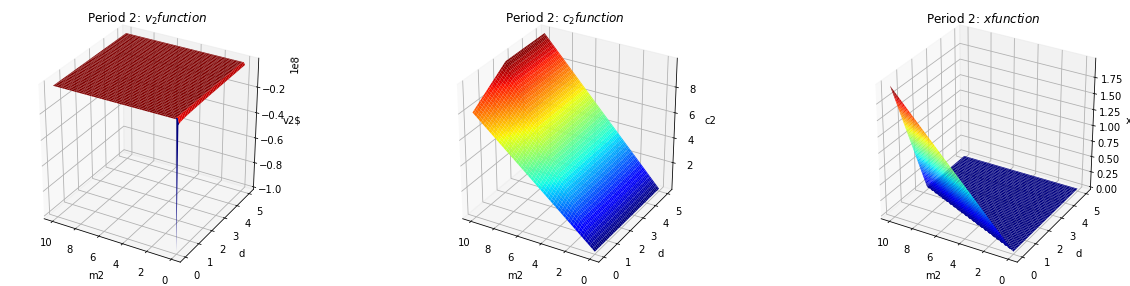

In [607]:
# Solving
m2_vec,v2_grid,c2_vec, x2_vec = solve_period_2(alpha,rho,chi)

# Setting up graphs
fig = plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.5)

ax = fig.add_subplot(1,3,1,projection='3d')
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')
cs = ax.plot_surface(m2_grid,d_grid,v2_grid,cmap=cm.jet)
ax.set_xlabel('m2')
ax.set_ylabel('d')
ax.set_zlabel('v2$')
ax.set_title('Period 2: $v_2 function$')
ax.invert_xaxis()

ax = fig.add_subplot(1,3,2,projection='3d')
cs = ax.plot_surface(m2_grid,d_grid,c2_vec,cmap=cm.jet)
ax.set_xlabel('m2')
ax.set_ylabel('d')
ax.set_zlabel('c2')
ax.set_title('Period 2: $c_2 function$')
ax.invert_xaxis()

ax = fig.add_subplot(1,3,3,projection='3d')
cs = ax.plot_surface(m2_grid,d_grid,x2_vec,cmap=cm.jet)
ax.set_xlabel('m2')
ax.set_ylabel('d')
ax.set_zlabel('x')
ax.set_title('Period 2: $x function$')
ax.invert_xaxis()

Graph 1: The graph shows that the households value having cash on hand as zero when entering period 2 for all values of m2 and d, except when both are equal to 0.

Graph 2: Here it is evident that the households choice of c, non-durable consumption, rises with an increase in m2 no matter what value of d, pre-comitted durable consumption, is.

Graph 3: From the last graph we can see, that x, the extra durable consumption, rises as a function of m2, while it for the most part iszero for values of d.

**Question 2:** Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.

In [562]:
# Importing relevant packages
from scipy import interpolate

# Setting up solver for period 1
def solve_period_1(beta,r,Delta,v1,v2_interp):

    v1_grid = np.empty(100)
    d1_vec = np.empty(100)
    
    # Solve for each m1 in m1_vec
    for i,m1 in enumerate(m1_vec):
        
        # Objective function
        obj = lambda d: -v1(d,m1,Delta,beta,r,v2_interp)
        
        # Setting initial guess to half of cash on hand
        x0 = m1/2
        
        # Optimizing
        res2 = optimize.minimize_scalar(obj,x0, method='bounded',bounds=[1e-8,m1])
        
        # Saving result
        v1_grid[i] = -res2.fun
        d1_vec[i] = res2.x
     
    return m1_vec,v1_grid,d1_vec

# b. construct interpolator
v2_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec], v2_grid,
                                                bounds_error=False,fill_value=None)


Text(0.5, 1.0, 'Period 1: v_1 function')

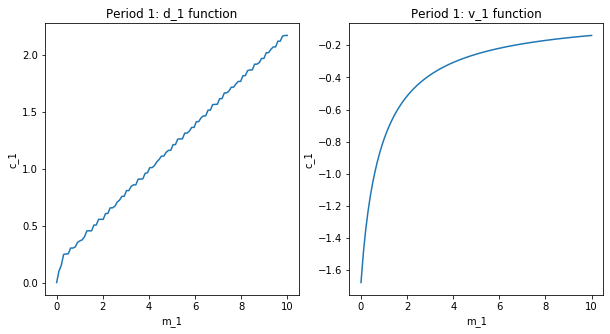

In [564]:
# Soving
m1_vec,v1_vec,d1_vec = solve_period_1(beta,r,Delta,v1,v2_interp)

# Setting up graphs
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(m1_vec,d1_vec)
ax.set_xlabel('m_1')
ax.set_ylabel('c_1')
ax.set_title('Period 1: d_1 function')

ax = fig.add_subplot(1,2,2)
ax.plot(m1_vec,v1_vec)
ax.set_xlabel('m_1')
ax.set_ylabel('c_1')
ax.set_title('Period 1: v_1 function')

Graph 1: This shows the positive correlation between cash on hand in period 1 and the non durable consumption that follows with it.

Graph 2: Here the value function is depicted (I think there has been a mistake somewhere, due to the negative values), and it can be seen that the consumer has a decreasing utility of extra cash on hand in period 1. This means that when the consumer have no cash on hand, just a tiny amount means a large increase in value, whereas the increase in value is smaller, when the amount of cash on hand already is large.

**Hint:** For interpolation of $v_2(m_2,d)$ consider using `interpolate.RegularGridInterpolator([GRID-VECTOR1,GRID-VECTOR2],VALUE-MATRIX,bounds_error=False,fill_value=None)`.

Next, consider an **extension** of the model, where there is also a **period 0**. In this period, the household makes a choice whether to stick with the level of durables it has, $z = 0$, or adjust its stock of durables, $z = 1$. If adjusting, the household loses a part of the value of its durable stock; more specificaly it incurs a proportional loss of $\Lambda \in (0,1)$.

Mathematically, the **household problem in period 0** is:

$$
\begin{aligned}
v_{0}(m_{0},d_{0}) &= \max_{z\in\{0,1\}} \begin{cases}
w(m_{0},d_{0}) & \text{if } z = 0\\
v_1(m_0+(1-\Lambda) d_{0}) & \text{if } z = 1\\
\end{cases}\\
\end{aligned}
$$

The **parameters** and **grids** for $m_0$ and $d_0$ should be:

In [5]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

**Question 3:** For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

# Gradient descent

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

**Question:** Implement the algorithm above such that the code below can run.

**Optimizer function:**

In [593]:
# Step 1: Setting values of Epsilon, Theta and Delta
def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):
    
    # step 2: Initializing
    x = x0
    n = 1
    
    # Initiating iteration
    while n < max_iter:
            
            # Step 3: Calculate numerical approximation ofJacobian
        jacx = np.array([f(x+np.array([Delta,0]))-f(x),f(x+np.array([0,Delta]))-f(x)])*Delta**-1
               
            # Step 4: Finding the maximum value of the jacobian, stopping if it less than epsilon
        maxjac = np.max(jacx)
        
        if maxjac < epsilon:
            break
        
            # Step 5: Setting the stepsize to Theta
        t_new = Theta
        
            # Step 6-8: Constructing f_teta and evaluating it, setting new stepsize
        while True:
            f_teta = f(x - t_new*jacx)
            
            if f_teta < f(x):
                break
                
            t_new = Theta/2
            
            # Step 9: Updating guess
        x = x - t_new*jacx
                            
            # # Step 10: Increment n
        n += 1
        
        return x,n
       
    pass

**Test case:**

In [594]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.0416,1.1220) after 2 iterations
not implemented yet


There is a result, but the fact that it has not been implemented, makes me think that I have made an error somewhere in the algorithm. The result, though, is that the optimal value of x1 is 1.04 and the optimal value of x2 is 1.12, when one wnts to minimze the Rosenbrock function.